### 模块-读取nc文件调试

In [3]:
# 正常输出
import data_processing
data_processing.get_files_in_folder(r'H:\temp\git-test\git-test\Irrigation-Water-Demands\data\natural')

['H:\\temp\\git-test\\git-test\\Irrigation-Water-Demands\\data\\natural\\lrad_CMFD_V0106_B-01_01yr_010deg_1979-2018.nc',
 'H:\\temp\\git-test\\git-test\\Irrigation-Water-Demands\\data\\natural\\prec_CMFD_V0106_B-01_01yr_010deg_1979-2018.nc',
 'H:\\temp\\git-test\\git-test\\Irrigation-Water-Demands\\data\\natural\\pres_CMFD_V0106_B-01_01yr_010deg_1979-2018.nc',
 'H:\\temp\\git-test\\git-test\\Irrigation-Water-Demands\\data\\natural\\shum_CMFD_V0106_B-01_01yr_010deg_1979-2018.nc',
 'H:\\temp\\git-test\\git-test\\Irrigation-Water-Demands\\data\\natural\\srad_CMFD_V0106_B-01_01yr_010deg_1979-2018.nc',
 'H:\\temp\\git-test\\git-test\\Irrigation-Water-Demands\\data\\natural\\temp_CMFD_V0106_B-01_01yr_010deg_1979-2018.nc',
 'H:\\temp\\git-test\\git-test\\Irrigation-Water-Demands\\data\\natural\\wind_CMFD_V0106_B-01_01yr_010deg_1979-2018.nc']

In [9]:
import data_processing
data_processing.get_files_in_folder(r'H:\temp\git-test\git-test\Irrigation-Water-Demands\data\natural', ',shp')

[]

### 模块-处理nc文件

In [41]:
import xarray as xr
p = xr.open_dataset(r'H:\temp\git-test\git-test\Irrigation-Water-Demands\data\natural\prec_CMFD_V0106_B-01_01yr_010deg_1979-2018.nc')
p_mean = p.to_array('prec').mean(dim = 'time')
p_values = p_values = p_mean.values[0]
p_mean = xr.DataArray(p_values, coords= [p_mean.coords['lat'], p_mean.coords['lon']])
type(p_mean)


xarray.core.dataarray.DataArray

In [8]:
# 正常输出
import data_processing
nc_files = data_processing.get_files_in_folder(r'H:\temp\git-test\git-test\Irrigation-Water-Demands\data\natural')

In [74]:
import os
result = {}
for nc_file in nc_files:
    var_name = os.path.basename(nc_file)[:4]
    var_mean = data_processing.squeeze_nc_time_axis(nc_file, var_name, lon = 'lon', lat = 'lat', time= 'time')  
    result[var_name] = var_mean


    

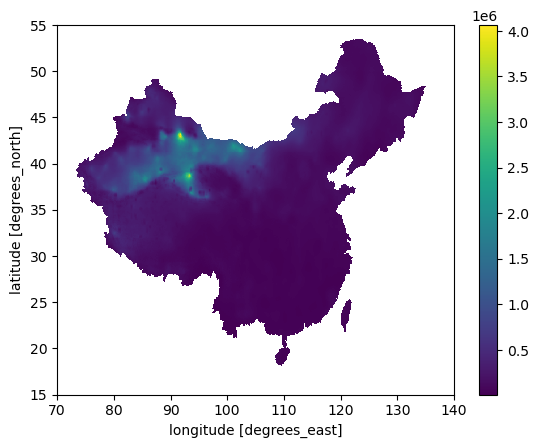

In [95]:
import calculate_pet
drought_index = calculate_pet.calculate_drought_index(result['temp'], result['shum'],result['pres'], result['srad'], result['lrad'], result['wind'], result['prec'])
drought_index.plot()


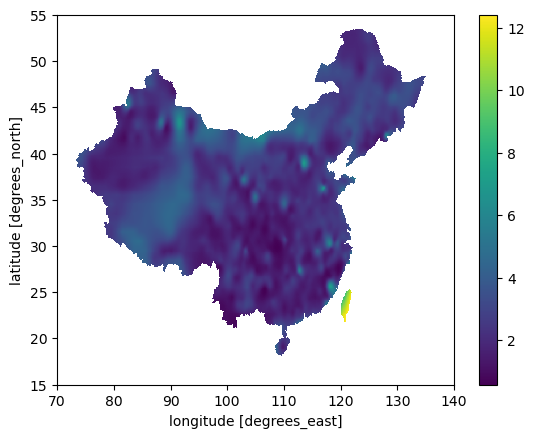

In [33]:
var_mean.plot()